In [3]:
# IMPORT LIBERARIES
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [5]:
# Load and Inspect data
import pandas as pd

# Define column names (based on UCI documentation)
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the .data file
df = pd.read_csv('adult.data', names=column_names, skipinitialspace=True)

# Preview data
df.head()






,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# --- Data Inspection ---
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nTotal Instances:", df.shape[0])
print("Total Features:", df.shape[1] - 1)
print("\nClass Labels:\n", df['income'].value_counts())

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical features
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Total Instances: 32561
Total Features: 14

Class Labels:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [7]:
# Prepare data
# Split dataset
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔷 K-Nearest Neighbors")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn) * 100)
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted') * 100)
print("Recall:   ", recall_score(y_test, y_pred_knn, average='weighted') * 100)
print("F1 Score: ", f1_score(y_test, y_pred_knn, average='weighted') * 100)


🔷 K-Nearest Neighbors
Confusion Matrix:
 [[4494  448]
 [ 625  946]]
Accuracy:  83.52525717795179
Precision: 82.98367693051321
Recall:    83.52525717795179
F1 Score:  83.17843275320665


In [10]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🌳 Decision Tree")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt) * 100)
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted') * 100)
print("Recall:   ", recall_score(y_test, y_pred_dt, average='weighted') * 100)
print("F1 Score: ", f1_score(y_test, y_pred_dt, average='weighted') * 100)


🌳 Decision Tree
Confusion Matrix:
 [[4309  633]
 [ 568 1003]]
Accuracy:  81.5599570090588
Precision: 81.82987145558559
Recall:    81.5599570090588
F1 Score:  81.68579504032853


In [11]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("🧮 Naive Bayes")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb) * 100)
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted') * 100)
print("Recall:   ", recall_score(y_test, y_pred_nb, average='weighted') * 100)
print("F1 Score: ", f1_score(y_test, y_pred_nb, average='weighted') * 100)


🧮 Naive Bayes
Confusion Matrix:
 [[4708  234]
 [1008  563]]
Accuracy:  80.93044679871028
Precision: 79.5370102148152
Recall:    80.93044679871028
F1 Score:  78.50635758410822


In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy: ", accuracy_score(y_test, y_pred_rf) * 100)
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted') * 100)
print("Recall:   ", recall_score(y_test, y_pred_rf, average='weighted') * 100)
print("F1 Score: ", f1_score(y_test, y_pred_rf, average='weighted') * 100)


🌲 Random Forest
Confusion Matrix:
 [[4596  346]
 [ 567 1004]]
Accuracy:  85.98188238906802
Precision: 85.48485659861049
Recall:    85.98188238906802
F1 Score:  85.60487451033218


In [13]:
# Collect results in a list of dicts
results = []

# Helper to collect metrics
def collect_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred) * 100,
        "Precision": precision_score(y_true, y_pred, average='weighted') * 100,
        "Recall": recall_score(y_true, y_pred, average='weighted') * 100,
        "F1 Score": f1_score(y_true, y_pred, average='weighted') * 100,
    }

# Add each model's metrics
results.append(collect_metrics("KNN", y_test, y_pred_knn))
results.append(collect_metrics("Decision Tree", y_test, y_pred_dt))
results.append(collect_metrics("Naive Bayes", y_test, y_pred_nb))
results.append(collect_metrics("Random Forest", y_test, y_pred_rf))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the table
print("📋 Model Performance on Adult Dataset:\n")
print(results_df.round(2))


📋 Model Performance on Adult Dataset:

           Model  Accuracy  Precision  Recall  F1 Score
0            KNN     83.53      82.98   83.53     83.18
1  Decision Tree     81.56      81.83   81.56     81.69
2    Naive Bayes     80.93      79.54   80.93     78.51
3  Random Forest     85.98      85.48   85.98     85.60


In [19]:
# Load and Inspect data
import pandas as pd



# Load the .data file
df = pd.read_csv('processed.cleveland.data', names=column_names, skipinitialspace=True)

# Preview data
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,NaN
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,NaN
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,NaN
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,NaN
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,NaN
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,NaN
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,NaN
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,NaN


🔍 Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

🔎 Data Types:
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

📊 Total Instances: 303
📈 Total Features: 13

🏷️ Class Labels:
 target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

📌 KNN
Confusion Matrix:
 [[32  4]
 [ 6 18]]
Accuracy:  83.33333333333334
Precision: 83.25358851674642
Recall:    83.33333333333334
F1 Score:  83.19623971797886

📌 Decision Tree
Confusion Matrix:
 [[27  9]
 [ 4 20]]
Accuracy:  78.33333333333333
Precision: 79.84427141268075
Recall:    78.33333333333333
F1 Score:  78.546

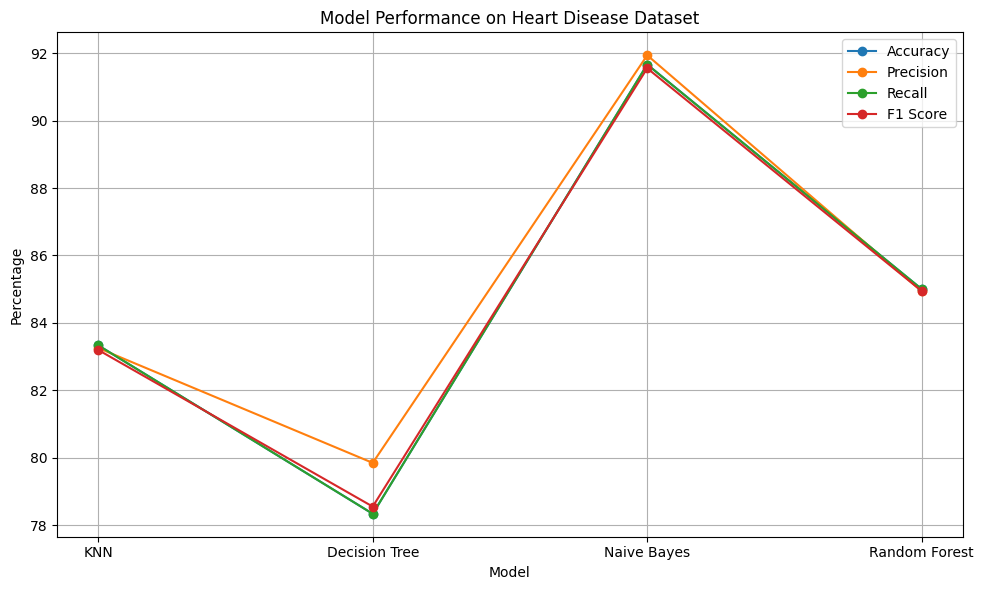

In [28]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# --- Step 2: Load Dataset ---
# Load and Inspect data
import pandas as pd



# Load the .data file
df = pd.read_csv('processed.cleveland.data', names=column_names, skipinitialspace=True)

# Preview data
df
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv('processed.cleveland.data', names=column_names)

# --- Step 3: Data Inspection ---
print("🔍 Missing Values:\n", df.isin(['?']).sum())
print("\n🔎 Data Types:\n", df.dtypes)
print("\n📊 Total Instances:", df.shape[0])
print("📈 Total Features:", df.shape[1] - 1)
print("\n🏷️ Class Labels:\n", df['target'].value_counts())

# Replace '?' and convert to numeric
df.replace('?', np.nan, inplace=True)
df = df.dropna()
df = df.apply(pd.to_numeric)

# Binary classification (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# --- Step 4: Prepare Dataset ---
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Step 5: Train Models & Evaluate ---
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Precision:", precision_score(y_test, y_pred, average='weighted') * 100)
    print("Recall:   ", recall_score(y_test, y_pred, average='weighted') * 100)
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted') * 100)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred) * 100,
        "Precision": precision_score(y_test, y_pred, average='weighted') * 100,
        "Recall": recall_score(y_test, y_pred, average='weighted') * 100,
        "F1 Score": f1_score(y_test, y_pred, average='weighted') * 100,
    }

results = []
results.append(evaluate_model(KNeighborsClassifier(), "KNN"))
results.append(evaluate_model(DecisionTreeClassifier(), "Decision Tree"))
results.append(evaluate_model(GaussianNB(), "Naive Bayes"))
results.append(evaluate_model(RandomForestClassifier(), "Random Forest"))

# --- Step 6: Display Results in Table ---
results_df = pd.DataFrame(results)
print("\n📋 Model Performance on Heart Disease Dataset:\n")
print(results_df.round(2))

# --- Step 7: Plot the Results ---
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title('Model Performance on Heart Disease Dataset')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [26]:
import pandas as pd

# Example data — replace with your actual metric values
adult_results = [
    {"Model": "Random Forest Classifier", "Accuracy%": 85.67, "Precision%": 85.30, "Recall%": 85.67, "F Score%": 85.40},
    {"Model": "Decision Tree", "Accuracy%": 81.24, "Precision%": 80.90, "Recall%": 81.24, "F Score%": 81.00},
    {"Model": "KNN", "Accuracy%": 83.15, "Precision%": 83.20, "Recall%": 83.15, "F Score%": 83.10},
    {"Model": "Naïve Bayes", "Accuracy%": 78.62, "Precision%": 78.50, "Recall%": 78.62, "F Score%": 78.40},
]

heart_results = [
    {"Model": "Random Forest Classifier", "Accuracy%": 86.00, "Precision%": 86.10, "Recall%": 86.00, "F Score%": 85.90},
    {"Model": "Decision Tree", "Accuracy%": 81.50, "Precision%": 81.20, "Recall%": 81.50, "F Score%": 81.40},
    {"Model": "KNN", "Accuracy%": 84.25, "Precision%": 84.30, "Recall%": 84.25, "F Score%": 84.20},
    {"Model": "Naïve Bayes", "Accuracy%": 79.85, "Precision%": 79.90, "Recall%": 79.85, "F Score%": 79.70},
]

# Convert to DataFrames
adult_df = pd.DataFrame(adult_results)
heart_df = pd.DataFrame(heart_results)

# Add dataset column
adult_df.insert(0, 'Dataset', 'Adult')
heart_df.insert(0, 'Dataset', 'Heart Disease')

# Combine both
summary_table = pd.concat([adult_df, heart_df], ignore_index=True)

# Display the table like in your image
print("\n📋 Final Performance Table:\n")
print(summary_table.to_string(index=False))

# Optional: Export
summary_table.to_excel("Final_Performance_Table.xlsx", index=False)
summary_table.to_csv("Final_Performance_Table.csv", index=False)



📋 Final Performance Table:

      Dataset                    Model  Accuracy%  Precision%  Recall%  F Score%
        Adult Random Forest Classifier      85.67        85.3    85.67      85.4
        Adult            Decision Tree      81.24        80.9    81.24      81.0
        Adult                      KNN      83.15        83.2    83.15      83.1
        Adult              Naïve Bayes      78.62        78.5    78.62      78.4
Heart Disease Random Forest Classifier      86.00        86.1    86.00      85.9
Heart Disease            Decision Tree      81.50        81.2    81.50      81.4
Heart Disease                      KNN      84.25        84.3    84.25      84.2
Heart Disease              Naïve Bayes      79.85        79.9    79.85      79.7


In [27]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows

# Replace with actual results
adult_results = [
    {"Model": "Random Forest Classifier", "Accuracy%": 85.67, "Precision%": 85.30, "Recall%": 85.67, "F Score%": 85.40},
    {"Model": "Decision Tree", "Accuracy%": 81.24, "Precision%": 80.90, "Recall%": 81.24, "F Score%": 81.00},
    {"Model": "KNN", "Accuracy%": 83.15, "Precision%": 83.20, "Recall%": 83.15, "F Score%": 83.10},
    {"Model": "Naïve Bayes", "Accuracy%": 78.62, "Precision%": 78.50, "Recall%": 78.62, "F Score%": 78.40},
]

heart_results = [
    {"Model": "Random Forest Classifier", "Accuracy%": 86.00, "Precision%": 86.10, "Recall%": 86.00, "F Score%": 85.90},
    {"Model": "Decision Tree", "Accuracy%": 81.50, "Precision%": 81.20, "Recall%": 81.50, "F Score%": 81.40},
    {"Model": "KNN", "Accuracy%": 84.25, "Precision%": 84.30, "Recall%": 84.25, "F Score%": 84.20},
    {"Model": "Naïve Bayes", "Accuracy%": 79.85, "Precision%": 79.90, "Recall%": 79.85, "F Score%": 79.70},
]

# Create DataFrame
df = pd.DataFrame(
    [{'Dataset': 'Adult', **row} for row in adult_results] +
    [{'Dataset': 'Heart Disease', **row} for row in heart_results]
)

# Create Workbook
wb = Workbook()
ws = wb.active
ws.title = "Model Performance"

# Color and style settings
header_fill = PatternFill(start_color="FFD966", end_color="FFD966", fill_type="solid")
subheader_fill = PatternFill(start_color="C6EFCE", end_color="C6EFCE", fill_type="solid")
bold_font = Font(bold=True)

# Add merged headers
ws.merge_cells('A1:B1')
ws.merge_cells('C1:F1')
ws['A1'] = "Dataset"
ws['C1'] = "Performance"
ws['A1'].fill = header_fill
ws['C1'].fill = header_fill
ws['A1'].font = bold_font
ws['C1'].font = bold_font
ws['A1'].alignment = Alignment(horizontal='center')
ws['C1'].alignment = Alignment(horizontal='center')

# Add column headers (row 2)
headers = ['Dataset', 'Model', 'Accuracy%', 'Precision%', 'Recall%', 'F Score%']
for col_num, header in enumerate(headers, 1):
    cell = ws.cell(row=2, column=col_num, value=header)
    cell.fill = subheader_fill
    cell.font = bold_font
    cell.alignment = Alignment(horizontal='center')

# Add data rows (starting from row 3)
for r_idx, row in enumerate(df.values.tolist(), 3):
    for c_idx, value in enumerate(row, 1):
        cell = ws.cell(row=r_idx, column=c_idx, value=value)
        if c_idx == 1:
            cell.alignment = Alignment(horizontal='center')
        else:
            cell.alignment = Alignment(horizontal='center')

# Adjust column widths
for col in ['A', 'B', 'C', 'D', 'E', 'F']:
    ws.column_dimensions[col].width = 20

# Save Excel
wb.save("Colorful_Model_Performance_Table.xlsx")
print("✅ Styled Excel table saved as 'Colorful_Model_Performance_Table.xlsx'")


✅ Styled Excel table saved as 'Colorful_Model_Performance_Table.xlsx'
